<a href="https://colab.research.google.com/github/Anshul-Kr-010/CSS_Portfolio/blob/main/Minor_Project(6th_Sem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
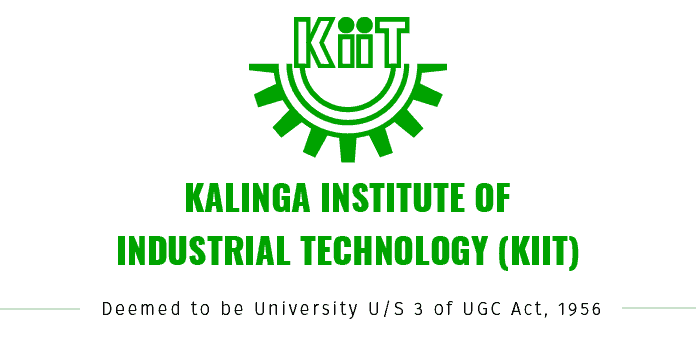

***6th Semester Machine Learning*** Project on ***Heart Attack Prediction*** Model by:

1.   Ankit Tiwary; 1907009
2.   Anshul Kumar; 1907010
3.   Manish Bisoi; 1907021
4.   Nirali Rout;  1907080


---









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('/content/heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.shape

(1025, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
correlation=dataset.corr()

***Exploratory Data Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


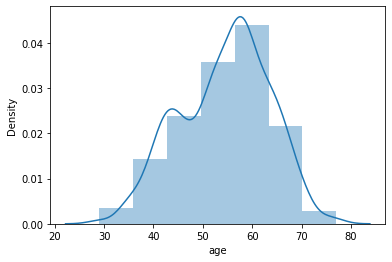

In [41]:
sns.distplot(dataset['age'],bins=7)

Most of the people in the dataset fall under the age of ***50-60.***

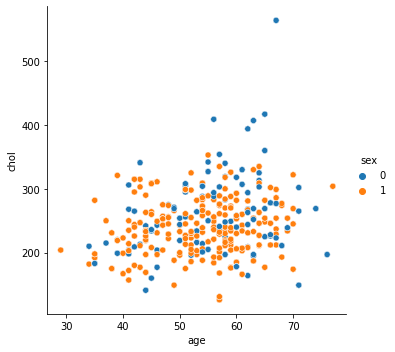

In [32]:
sns.relplot(x='age', y='chol', hue='sex', data=dataset)

From the above visualization, we can draw an insight on the distribution of cholestrol in Males(0) and Females(1). ***The highest cholestrol was that of a Male near the age of 65.***

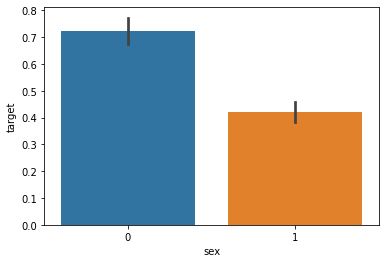

In [38]:
sns.barplot(x='sex', y='target', data=dataset)

From the barplot we can state that ***Males were more prone to heart diseases.***

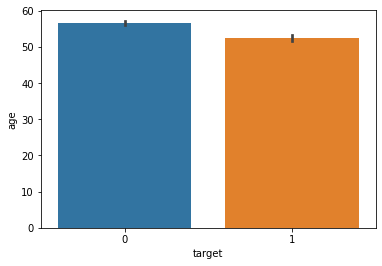

In [46]:
sns.barplot(x='target', y='age', data=dataset)

We can observe that people of age ***50-60 were more prone to heart disease.***

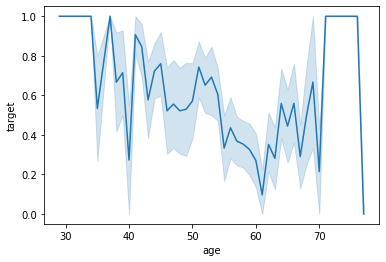

In [52]:
sns.lineplot(x='age', y='target', data=dataset)

To get a precise insight on the target data, lineplot is proved to be very beneficial as it provided the actual estimate of the age of the people more prone to heart disease. 

As you can see, ***people between the age 30-35 were prone to heart disease*** which later became irregular i,e. based on other factors inside the dataset but later on remained constant for quite some time between the ***ages 70-75.***

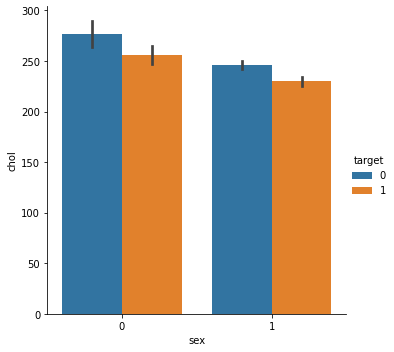

In [63]:
sns.catplot(data=dataset, kind="bar", x="sex", y="chol", hue="target")

This visualization gives an insight that states that, ***Males that had cholestrol above 250 had sufferred from heart diseases*** Whereas ***Females that had cholestrol less than 250 and above 225 were prone to heart disease.***

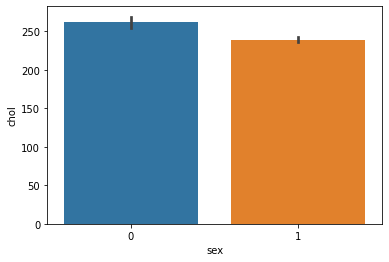

In [39]:
sns.barplot(x='sex', y='chol', data=dataset)

Similarly, from the above visualization we can see that ***males had the highest level of cholestrol accumulation.***

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

***Accuracy Calculation Process***

In [9]:
X=dataset.drop(columns='target',axis=1)
Y=dataset['target']

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [11]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=5)

In [13]:
X.shape

(1025, 13)

In [14]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [15]:
Y.shape

(1025,)

In [16]:
Y_train.shape, Y_test.shape

((820,), (205,))

In [17]:
regression=LogisticRegression()

In [18]:
regression.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
X_train_prediction = regression.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction, Y_train)

In [20]:
training_accuracy

0.8475609756097561

In [21]:
X_test_prediction = regression.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction, Y_test)

In [22]:
testing_accuracy

0.8634146341463415

In [23]:
raw_data = (52,1,0,125,212,0,1,168,0,1.0,2,2,3)
raw_data_to_array = np.asarray(raw_data)
raw_data_reshape = raw_data_to_array.reshape(1,-1)
predict_input = regression.predict(raw_data_reshape)

if (predict_input[0]==0):
  print("The Person will not suffer from heart attack.")
else:
    print("The person might suffer from heart attack.")
print(predict_input)

The Person will not suffer from heart attack.
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
